<a href="https://colab.research.google.com/github/URPDataScience/URP_ML2/blob/master/ML2_Voice_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1. INTRODUCTION**


One of the most common means of communication in the
world is through voice. In the real world, it is possible for a
person to verify the gender of a person through voice. Voice
is filled with lots of linguistic features. These voice features
are considered as the voice prints to recognize the gender of
a speaker. The recorded voice is considered as the input to
the system, which then the system process to get voice
features. Examine the input and compare it with the trained
model, carry out calculations based on the algorithm used
and gives the latest matching output. Gender recognition can
be used along with various other applications. 

Some are:

 For detecting feeling like male sad, female anger,
etc.

 Differentiating audios and videos using tags.

 Spontaneous salutations.

 Helping personal assistants to answer questions
with gender-specific results etc.



**Gender Recognition by Voice and Speech Analysis**

Read the full article.

This project trains a computer program to identify a voice as male or female, based upon acoustic properties of the voice and speech. The model is trained on a dataset consisting of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R and then processed with artificial intelligence/machine learning algorithms to learn gender-specific traits for classifying the voice as male or female.

The best model achieves an accuracy of 100% on the training set and 89% on the test set.

Update: By narrowing the frequency range analyzed to 0hz-280hz (human vocal range), the best accuracy is boosted to 100%/99%.



Gender Recognition by Voice and Speech Analysis

Read the full article.

This project trains a computer program to identify a voice as male or female, based upon acoustic properties of the voice and speech. The model is trained on a dataset consisting of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R and then processed with artificial intelligence/machine learning algorithms to learn gender-specific traits for classifying the voice as male or female.

The best model achieves an accuracy of 100% on the training set and 89% on the test set.

Update: By narrowing the frequency range analyzed to 0hz-280hz (human vocal range), the best accuracy is boosted to 100%/99%.
Gender Recognition by Voice and Speech Analysis

Read the full article.

This project trains a computer program to identify a voice as male or female, based upon acoustic properties of the voice and speech. The model is trained on a dataset consisting of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R and then processed with artificial intelligence/machine learning algorithms to learn gender-specific traits for classifying the voice as male or female.

The best model achieves an accuracy of 100% on the training set and 89% on the test set.

Update: By narrowing the frequency range analyzed to 0hz-280hz (human vocal range), the best accuracy is boosted to 100%/99%.


The Dataset

Download the pre-processed dataset as a CSV file.

The CSV file contains the following fields:

"meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"

"label" corresponds to the gender classification of the sample. The remaining fields are acoustic properties, detailed below.

In R, you can load the dataset file data.bin directly as a data.frame with the command load('data.bin').

In addition to the pre-processed dataset, the raw voice samples used for training are included as .WAV files in a separate repository. The .WAV files are pre-processed in R to produce the above dataset.

**Acoustic Properties Measured**

The following acoustic properties of each voice are measured:
•duration: length of signal

•meanfreq: mean frequency (in kHz)

•sd: standard deviation of frequency

•median: median frequency (in kHz)

•Q25: first quantile (in kHz)

•Q75: third quantile (in kHz)

•IQR: interquantile range (in kHz)

•skew: skewness (see note in specprop description)

•kurt: kurtosis (see note in specprop description)

•sp.ent: spectral entropy

•sfm: spectral flatness

•mode: mode frequency

•centroid: frequency centroid (see specprop)

•peakf: peak frequency (frequency with highest energy)

•meanfun: average of fundamental frequency measured across acoustic signal

•minfun: minimum fundamental frequency measured across acoustic signal

•maxfun: maximum fundamental frequency measured across acoustic signal

•meandom: average of dominant frequency measured across acoustic signal
•mindom: minimum of dominant frequency measured across acoustic signal

•maxdom: maximum of dominant frequency measured across acoustic signal
•dfrange: range of dominant frequency measured across acoustic signal

•modindx: modulation index. Calculated as the accumulated absolute difference 
between adjacent measurements of fundamental frequencies divided by the frequency range






























In [1]:
## Importing packages      
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analys
### Import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output
from __future__ import division, absolute_import, print_function

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## Importing the Dataset
import pandas as pd
voice_data = pd.read_csv("https://raw.githubusercontent.com/banduguide/URP_ML2/master/gender_recognition_by_voice.csv")   # Importing training dataset using pd.read_csv

In [3]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [0]:
### Preprocessing: label encoder and normalization

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice_data["label"] = le.fit_transform(voice_data["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
voice_data[:]=preprocessing.MinMaxScaler().fit_transform(voice_data)
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


In [7]:
voice_data.describe

<bound method NDFrame.describe of       meanfreq        sd    median  ...   dfrange   modindx  label
0     0.096419  0.473409  0.084125  ...  0.000000  0.000000    1.0
1     0.125828  0.505075  0.116900  ...  0.002146  0.056449    1.0
2     0.179222  0.675536  0.102873  ...  0.000358  0.049885    1.0
3     0.528261  0.554611  0.587559  ...  0.025393  0.265043    1.0
4     0.452195  0.627209  0.454272  ...  0.250715  0.223380    1.0
...        ...       ...       ...  ...       ...       ...    ...
3163  0.436911  0.684871  0.570361  ...  0.192418  0.173674    0.0
3164  0.362946  0.731172  0.262871  ...  0.166667  0.298053    0.0
3165  0.484949  0.799042  0.690337  ...  0.134120  0.208885    0.0
3166  0.492516  0.745692  0.695311  ...  0.164163  0.333559    0.0
3167  0.595700  0.768964  0.687590  ...  0.025036  0.375386    0.0

[3168 rows x 21 columns]>

In [8]:
voice_data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

 **Visualization**

In [0]:
voice_data(label.plot('bar'))

In [0]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("label as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(voice_data.label(),autopct='%1.1f%%', labels=['female','male'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

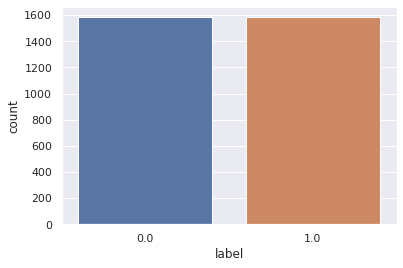

In [11]:
import seaborn as sns
sns.countplot(x="label",data=voice_data)

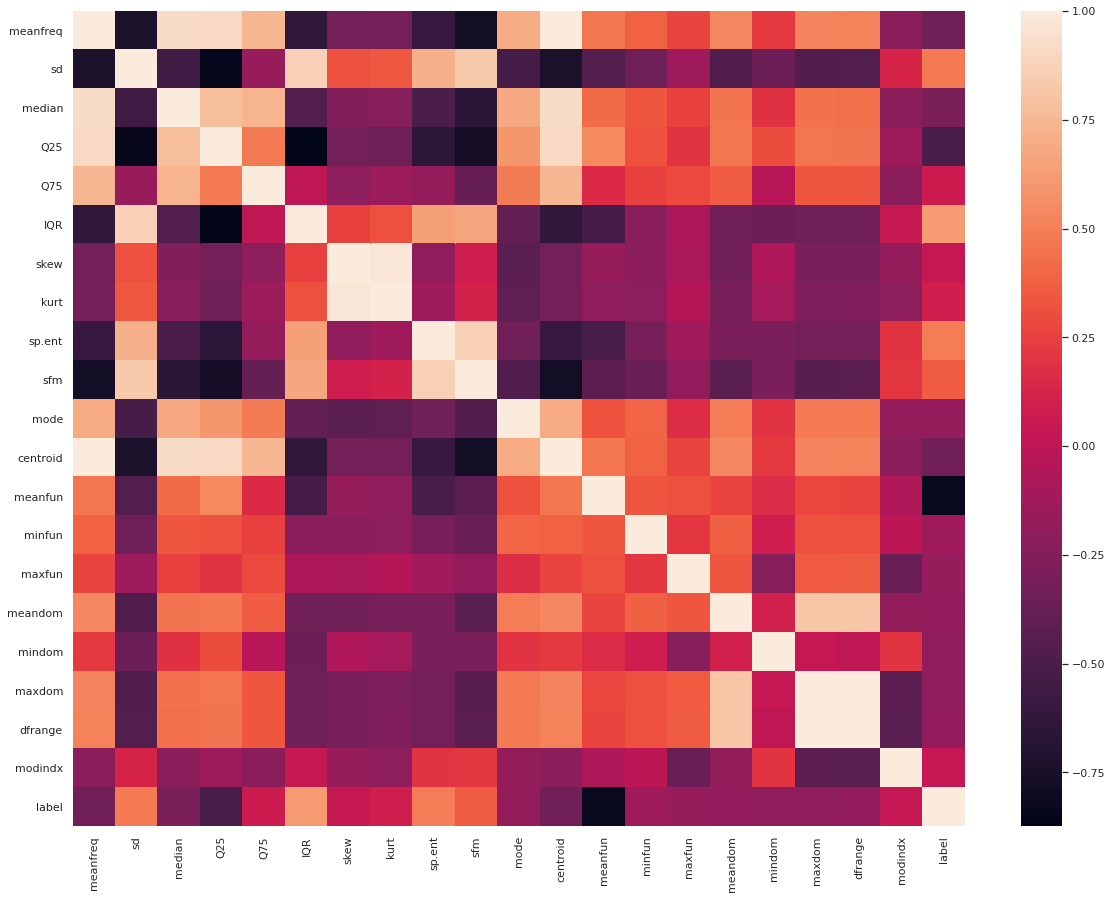

In [12]:
# Seaborn Heatmap that show coorelations 
import seaborn as sns
plt.figure(figsize = (20,15))
sns.heatmap(voice_data.corr())

In [13]:

voice_data.corr().label.sort_values()

meanfun    -0.833921
Q25        -0.511455
meanfreq   -0.337415
centroid   -0.337415
median     -0.283919
maxdom     -0.195657
mindom     -0.194974
dfrange    -0.192213
meandom    -0.191067
mode       -0.171775
maxfun     -0.166461
minfun     -0.136692
modindx     0.030801
skew        0.036627
Q75         0.066906
kurt        0.087195
sfm         0.357499
sd          0.479539
sp.ent      0.490552
IQR         0.618916
label       1.000000
Name: label, dtype: float64

In [0]:
sns.FacetGrid(voice_data, hue="label", size=5) \
   .map(plt.scatter,"meanfreq", "sd", "median", "Q25", "Q75", "IQR", "skew", "kurt",
       "sp.ent", "sfm", "mode", "centroid", "meanfun", "minfun","maxfun",
       "meandom", "mindom", "maxdom", "dfrange", "modindx" ) \
   .add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


KeyboardInterrupt: ignored

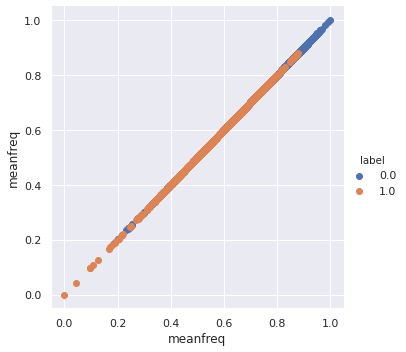

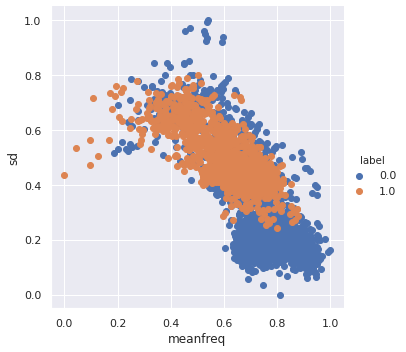

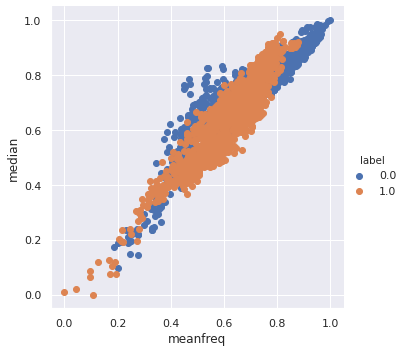

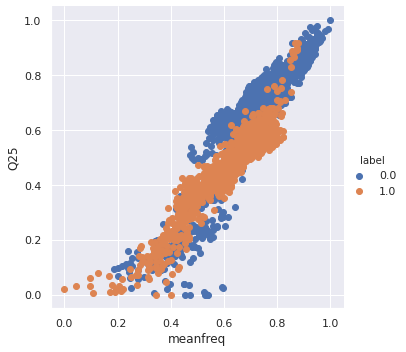

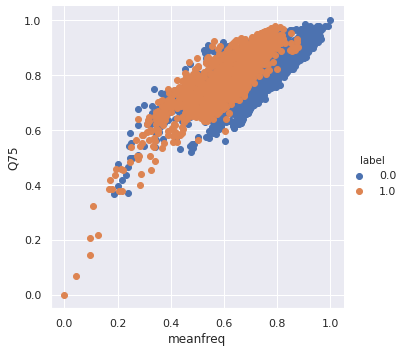

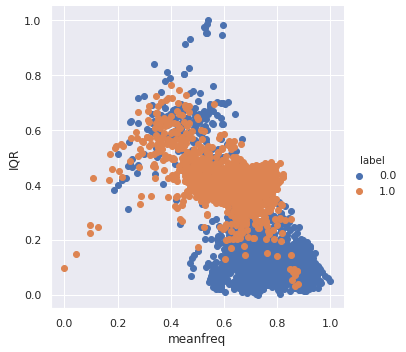

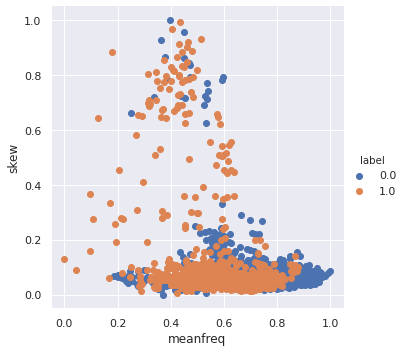

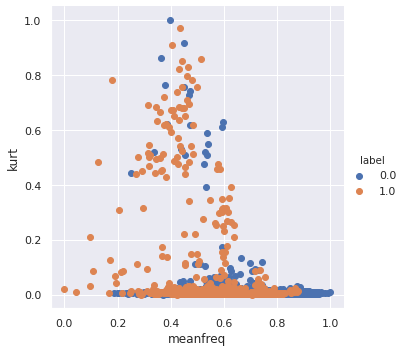

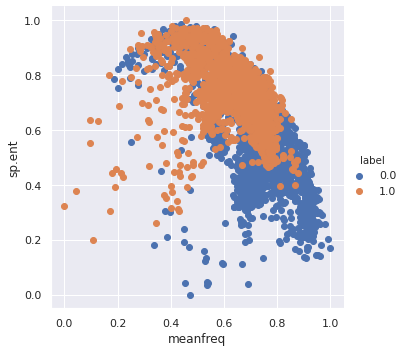

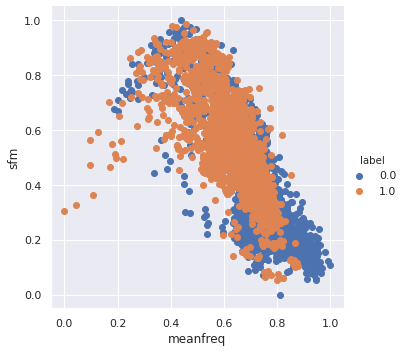

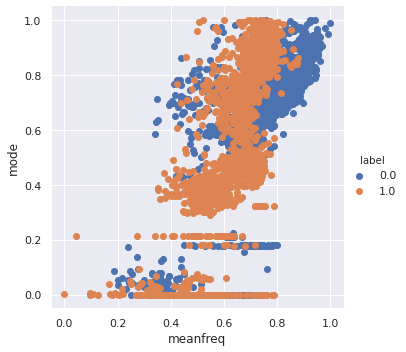

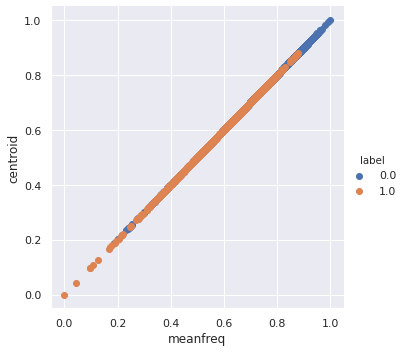

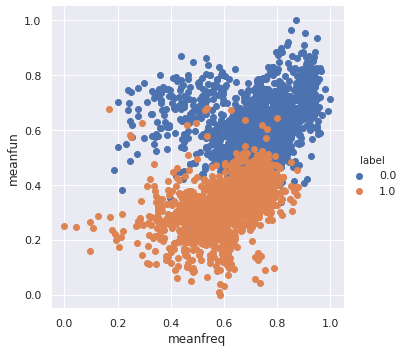

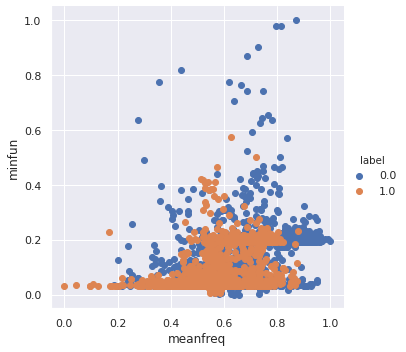

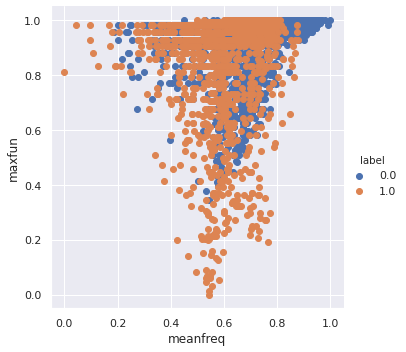

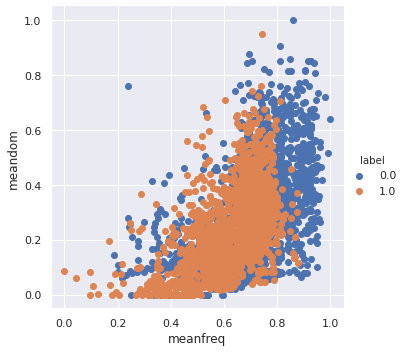

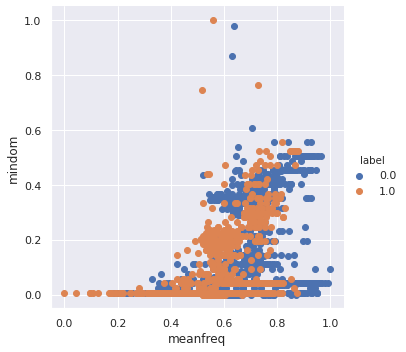

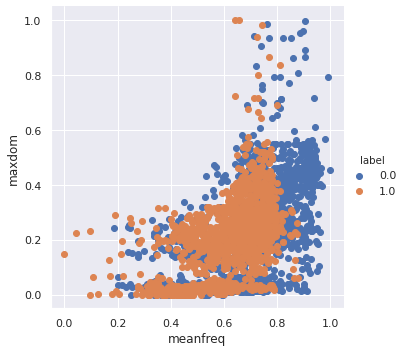

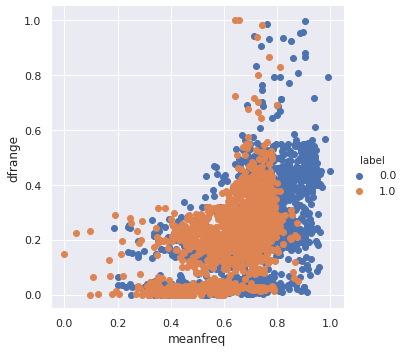

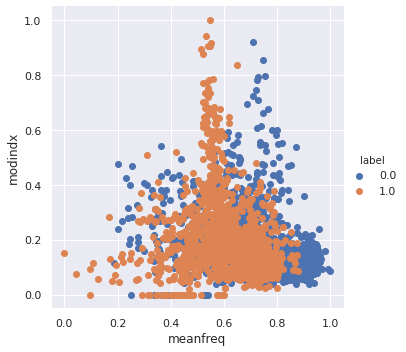

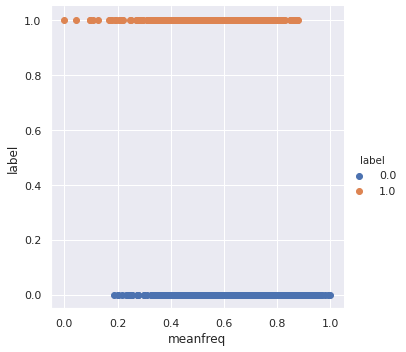

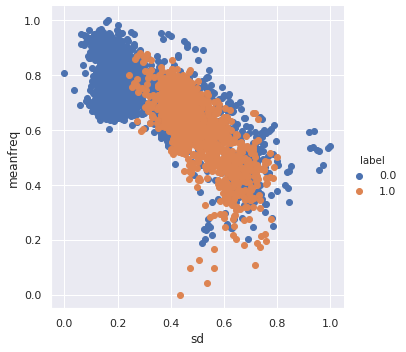

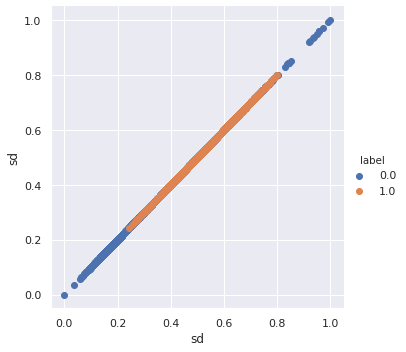

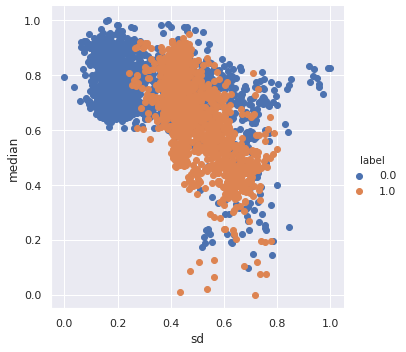

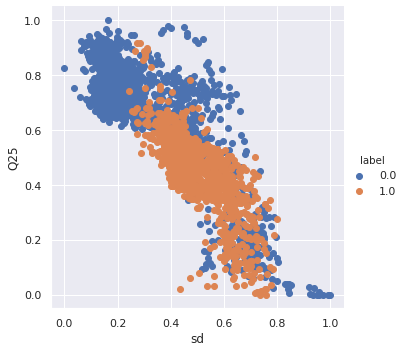

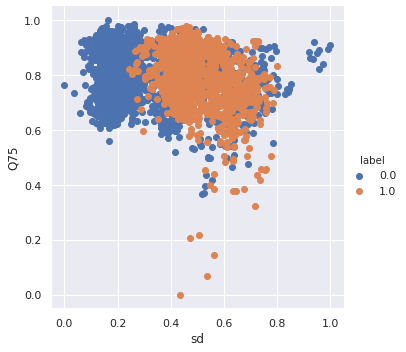

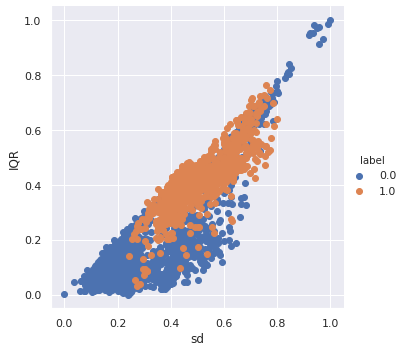

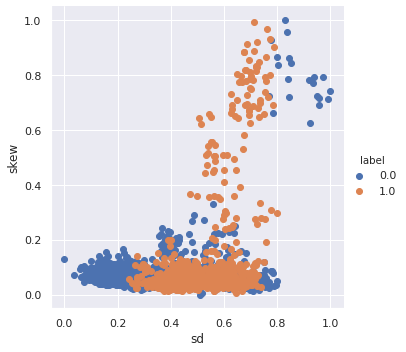

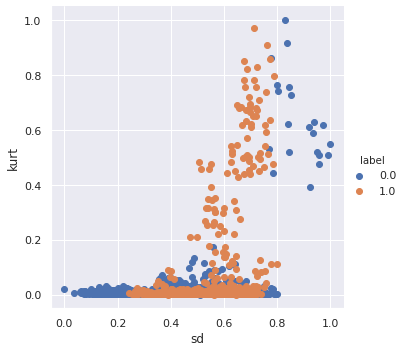

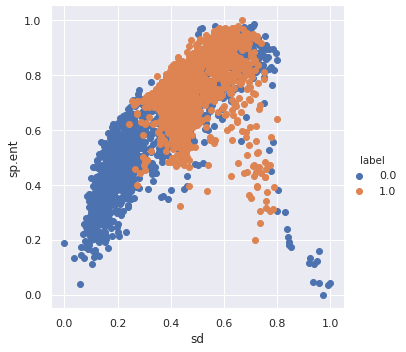

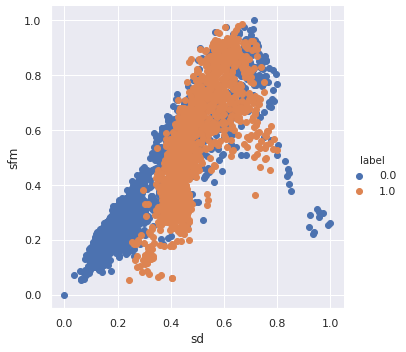

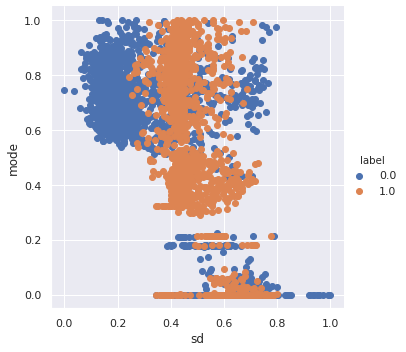

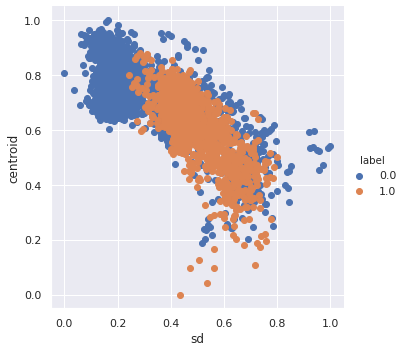

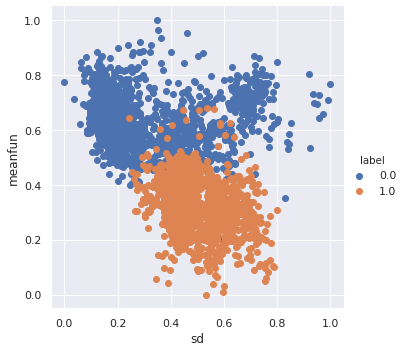

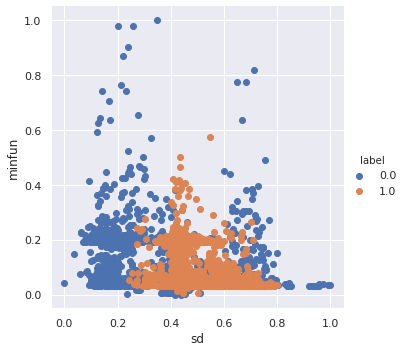

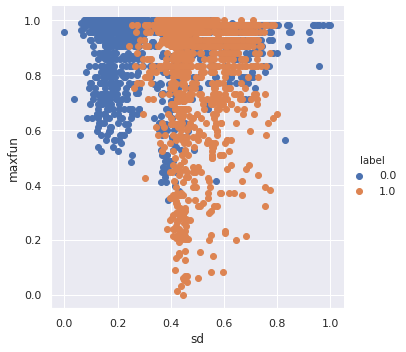

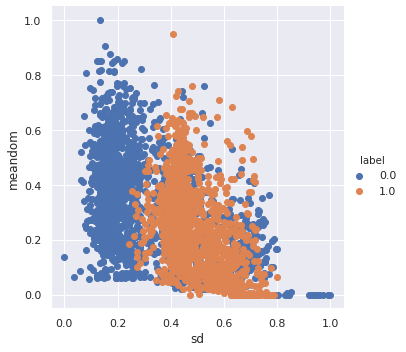

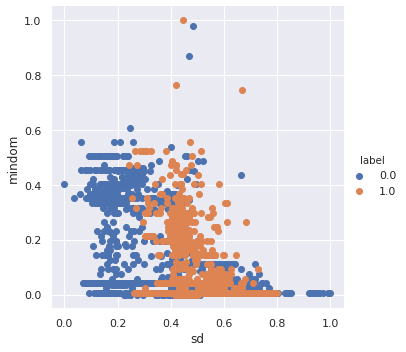

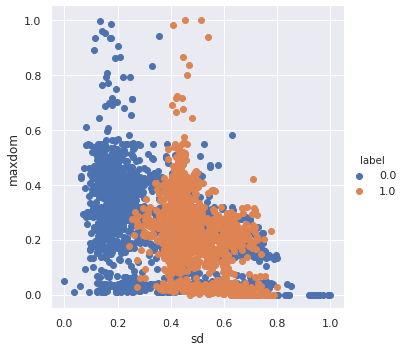

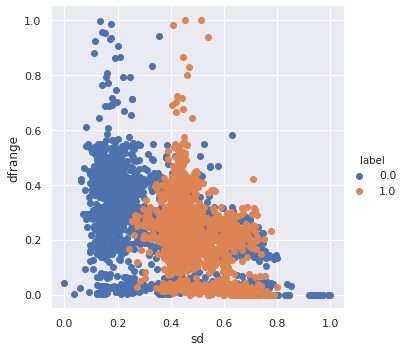

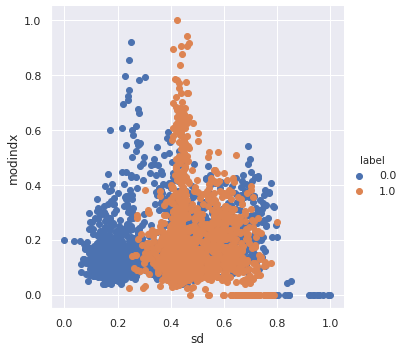

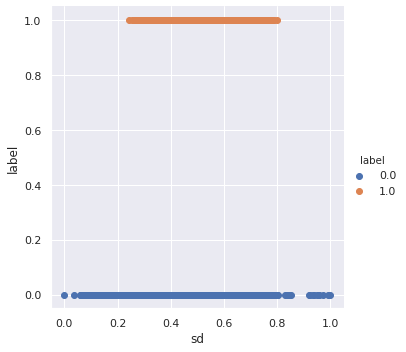

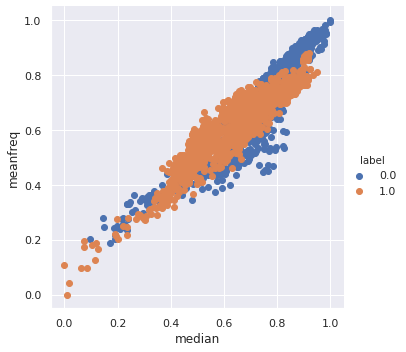

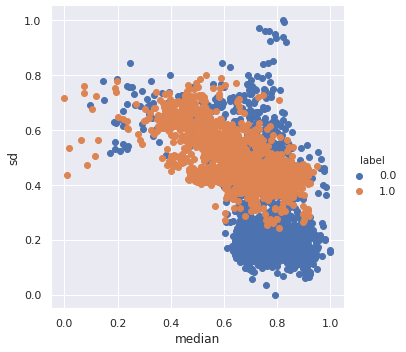

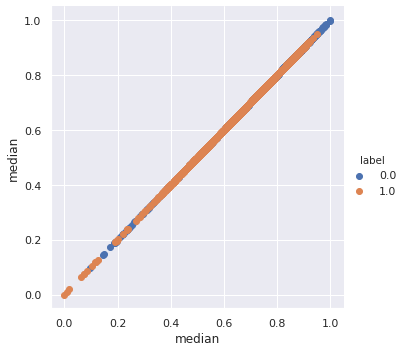

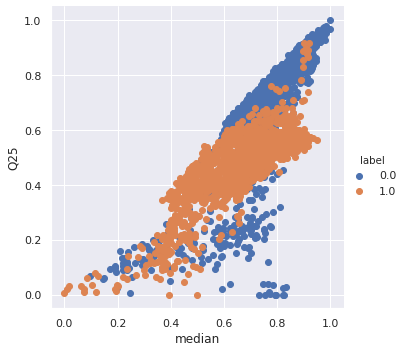

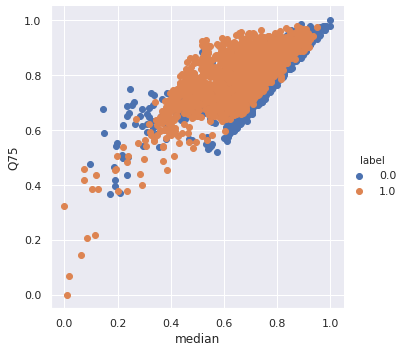

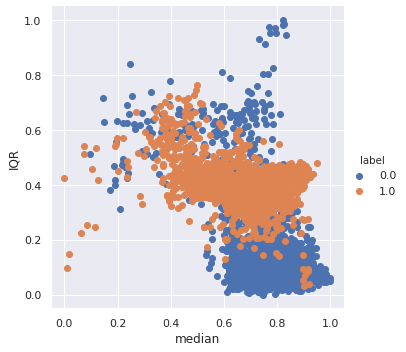

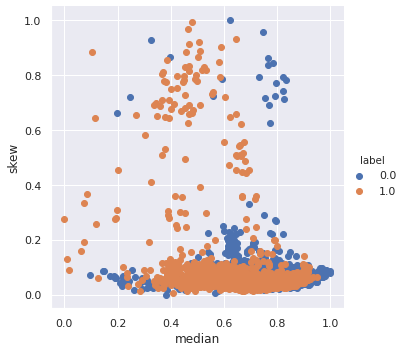

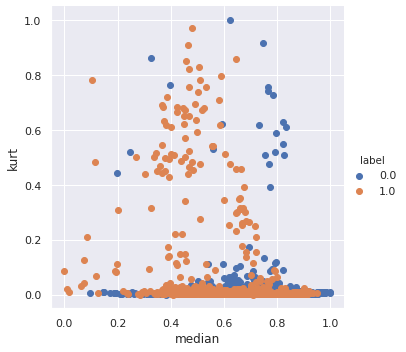

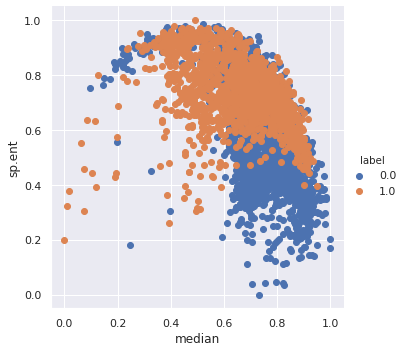

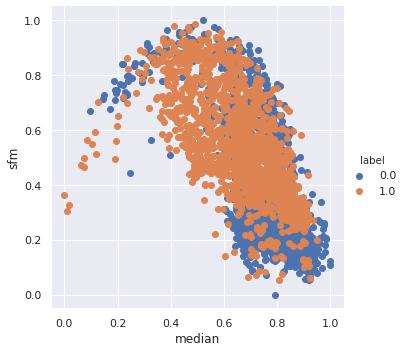

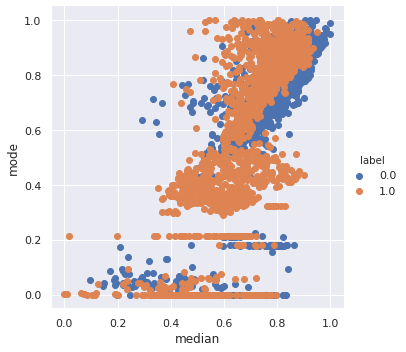

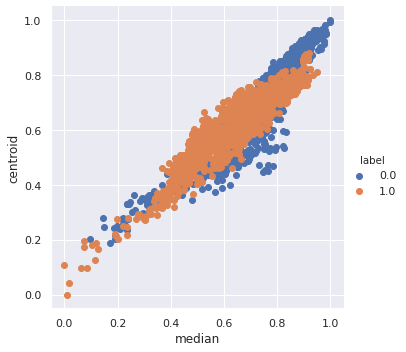

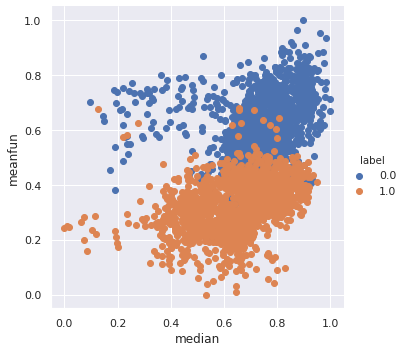

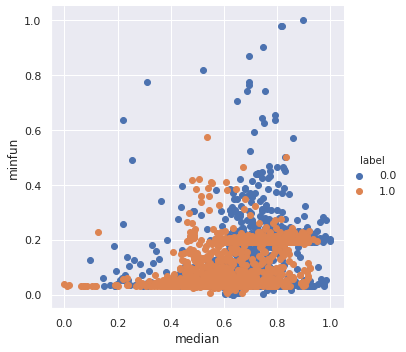

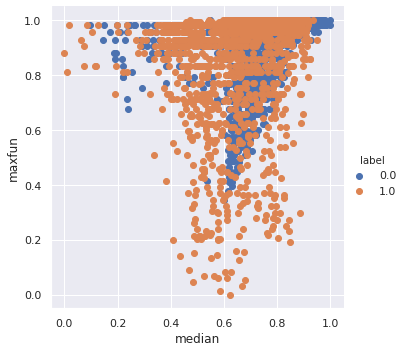

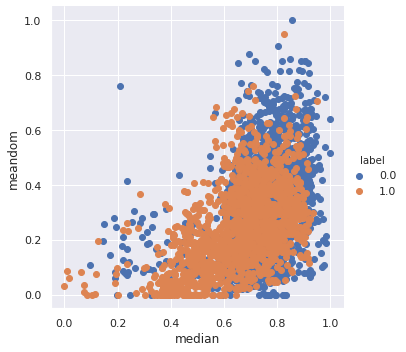

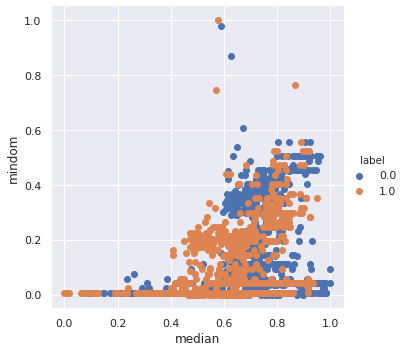

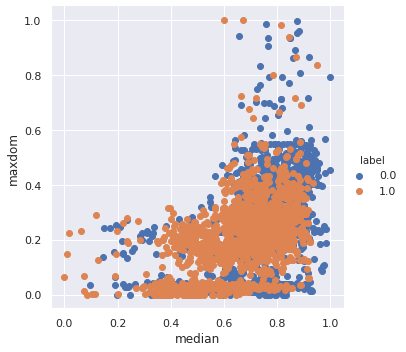

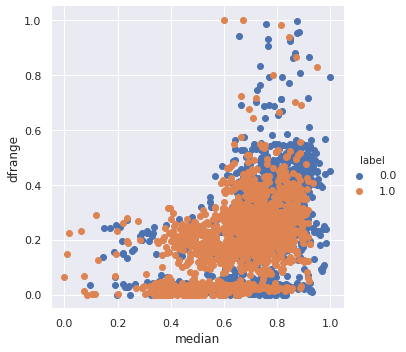

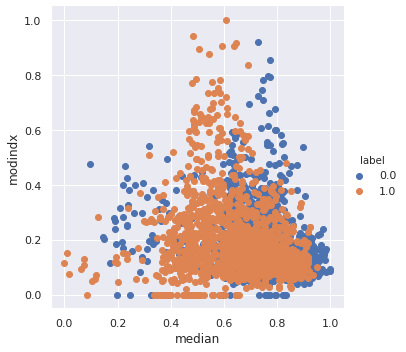

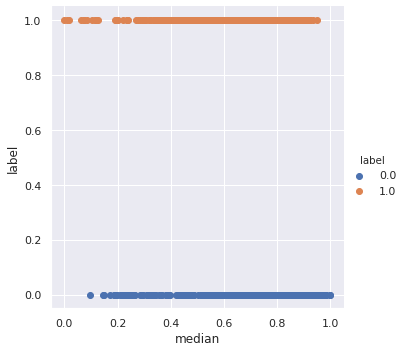

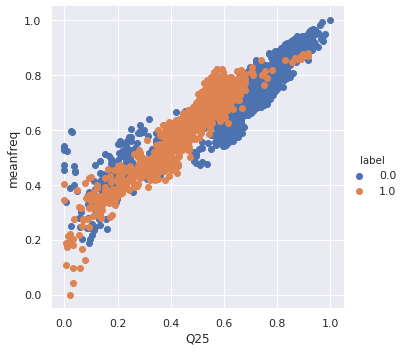

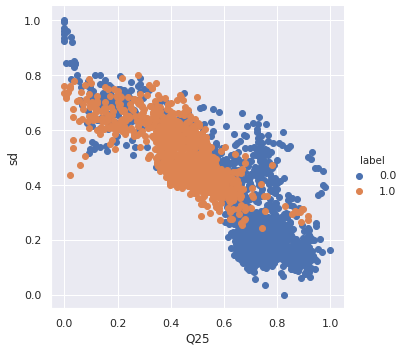

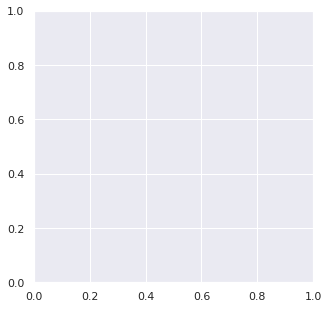

In [19]:
for a in voice_data.columns:
    for b in voice_data.columns:
        sns.FacetGrid(voice_data, hue="label", size=5) \
       .map(plt.scatter, a, b) \
       .add_legend()

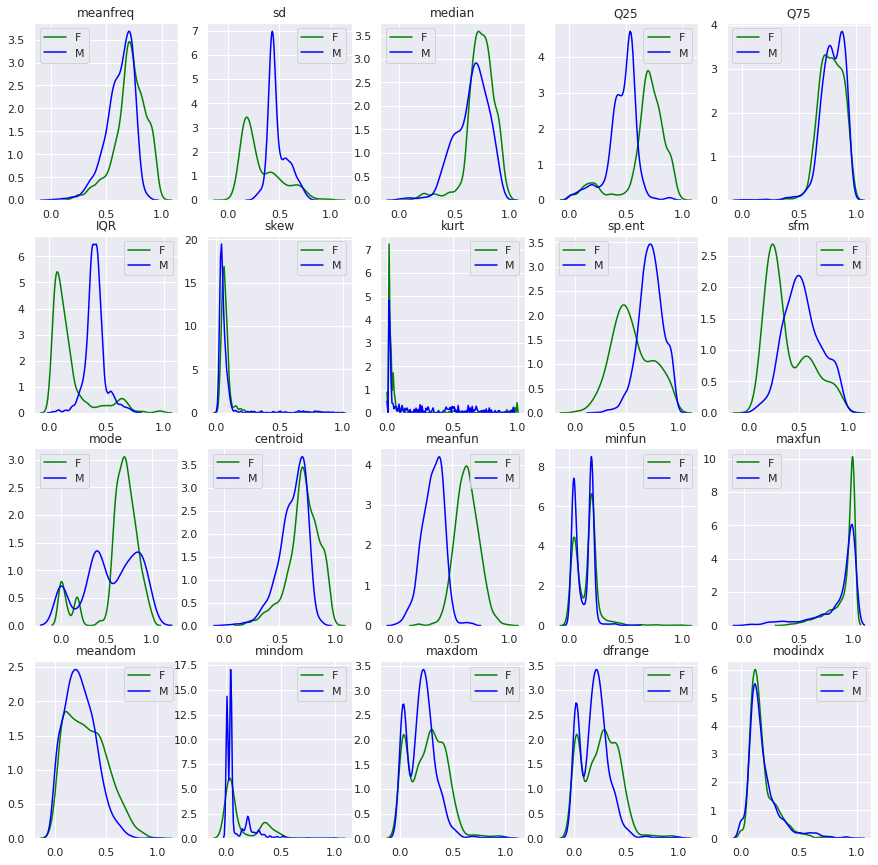

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice_data.columns[i-1])
    sns.kdeplot(voice_data.loc[voice_data['label'] == 0, voice_data.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice_data.loc[voice_data['label'] == 1, voice_data.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [0]:
# Split the data
train, test = train_test_split(voice_data, test_size=0.3)

In [24]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1449,0.659918,0.446585,0.660423,0.577422,0.849488,0.342054,0.049425,0.003798,0.746499,0.489699,0.601227,0.659918,0.370202,0.207017,0.990585,0.363628,0.040860,0.200143,0.199571,0.206321,1.0
1798,0.684487,0.134750,0.691539,0.693531,0.658064,0.035657,0.087659,0.008923,0.379600,0.217288,0.679032,0.684487,0.615748,0.059192,0.981526,0.253917,0.350538,0.248749,0.241774,0.151186,0.0
346,0.572049,0.445978,0.628869,0.416471,0.718051,0.381918,0.066081,0.006406,0.769839,0.589637,0.368380,0.572049,0.311397,0.114644,0.992409,0.332242,0.000000,0.182586,0.182851,0.300506,1.0
1894,0.702981,0.623290,0.786142,0.726728,0.896201,0.232119,0.043813,0.002828,0.751817,0.585368,0.178244,0.702981,0.557944,0.035289,0.981526,0.082101,0.109677,0.033238,0.031116,0.221903,0.0
1232,0.712824,0.442331,0.719827,0.543766,0.883731,0.410261,0.029793,0.000871,0.662699,0.354541,0.407029,0.712824,0.414821,0.195007,0.999749,0.418156,0.040860,0.718013,0.717811,0.040714,1.0


In [0]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [0]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]


In [37]:
x_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2866,0.797797,0.263794,0.796082,0.779035,0.806264,0.090499,0.108567,0.016132,0.489298,0.339232,0.754848,0.797797,0.537943,0.192356,0.999749,0.306018,0.040860,0.302001,0.301502,0.113665
348,0.548884,0.432131,0.608180,0.414268,0.699192,0.365917,0.061820,0.004772,0.757659,0.607298,0.355658,0.548884,0.327805,0.050210,0.871017,0.254390,0.193548,0.180799,0.177039,0.348957
3094,0.557047,0.413114,0.642238,0.596387,0.604859,0.085060,0.145362,0.028739,0.604622,0.542633,0.612549,0.557047,0.548647,0.016617,0.909352,0.071265,0.107527,0.032479,0.030401,0.231225
1886,0.634092,0.600606,0.728295,0.520948,0.819008,0.371209,0.024353,0.001173,0.941880,0.892953,0.720247,0.634092,0.490142,0.033036,0.880415,0.062616,0.006452,0.015011,0.015021,0.251108
2987,0.633556,0.373238,0.633868,0.608409,0.684378,0.149686,0.073076,0.007037,0.743062,0.569272,0.565714,0.633556,0.454994,0.070786,0.506842,0.175067,0.000000,0.060847,0.061025,0.509256


In [40]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1449,0.659918,0.446585,0.660423,0.577422,0.849488,0.342054,0.049425,0.003798,0.746499,0.489699,0.601227,0.659918,0.370202,0.207017,0.990585,0.363628,0.040860,0.200143,0.199571,0.206321
1798,0.684487,0.134750,0.691539,0.693531,0.658064,0.035657,0.087659,0.008923,0.379600,0.217288,0.679032,0.684487,0.615748,0.059192,0.981526,0.253917,0.350538,0.248749,0.241774,0.151186
346,0.572049,0.445978,0.628869,0.416471,0.718051,0.381918,0.066081,0.006406,0.769839,0.589637,0.368380,0.572049,0.311397,0.114644,0.992409,0.332242,0.000000,0.182586,0.182851,0.300506
1894,0.702981,0.623290,0.786142,0.726728,0.896201,0.232119,0.043813,0.002828,0.751817,0.585368,0.178244,0.702981,0.557944,0.035289,0.981526,0.082101,0.109677,0.033238,0.031116,0.221903
1232,0.712824,0.442331,0.719827,0.543766,0.883731,0.410261,0.029793,0.000871,0.662699,0.354541,0.407029,0.712824,0.414821,0.195007,0.999749,0.418156,0.040860,0.718013,0.717811,0.040714


In [38]:
y_test.head()

2866    0.0
348     1.0
3094    0.0
1886    0.0
2987    0.0
Name: label, dtype: float64

In [39]:
y_train.head()

1449    1.0
1798    0.0
346     1.0
1894    0.0
1232    1.0
Name: label, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [45]:
linreg.fit(x_train, y_train) # this is the trianing code. all learning is happening here\

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
x_test.shape

(951, 20)

In [47]:
y_test.iloc[0]

0.0

In [48]:
x_test.iloc[0]

meanfreq    0.797797
sd          0.263794
median      0.796082
Q25         0.779035
Q75         0.806264
IQR         0.090499
skew        0.108567
kurt        0.016132
sp.ent      0.489298
sfm         0.339232
mode        0.754848
centroid    0.797797
meanfun     0.537943
minfun      0.192356
maxfun      0.999749
meandom     0.306018
mindom      0.040860
maxdom      0.302001
dfrange     0.301502
modindx     0.113665
Name: 2866, dtype: float64

In [50]:
linreg.predict(x_test.iloc[20])

ValueError: ignored

In [51]:
y_test.iloc[20]

1.0

In [0]:
y_pred = linreg.predict([x_test.iloc[5]])

In [55]:
y_pred

array([0.6475985])

In [56]:
x_test.iloc[0]

meanfreq    0.797797
sd          0.263794
median      0.796082
Q25         0.779035
Q75         0.806264
IQR         0.090499
skew        0.108567
kurt        0.016132
sp.ent      0.489298
sfm         0.339232
mode        0.754848
centroid    0.797797
meanfun     0.537943
minfun      0.192356
maxfun      0.999749
meandom     0.306018
mindom      0.040860
maxdom      0.302001
dfrange     0.301502
modindx     0.113665
Name: 2866, dtype: float64

In [57]:
linreg.predict([x_test.iloc[0]])


array([0.25029821])

In [58]:
y_pred - y_test.iloc[0]

array([0.6475985])

In [59]:
linreg.predict(x_test) 

array([ 2.50298222e-01,  7.41995490e-01, -1.44320677e-03,  4.50939504e-01,
        2.92783227e-01,  6.47598497e-01,  7.44334464e-01,  2.18478793e-01,
       -3.79984200e-02,  8.46347542e-01,  2.18769693e-01,  6.87220314e-01,
        9.55847114e-01, -9.44401656e-02,  1.25205807e+00,  2.47705350e-01,
        9.86464392e-01,  3.36916423e-01, -5.08814841e-02,  9.06513666e-01,
        1.15831485e+00, -1.71726569e-01, -4.33307589e-02,  1.12360251e+00,
        8.24133373e-02, -9.81570286e-03, -1.80822033e-01, -1.16720758e-02,
       -7.51134735e-02,  9.29269538e-01,  8.84495064e-01,  1.03666676e+00,
       -6.51632614e-02,  7.31084781e-02,  4.64139632e-01,  2.33032491e-01,
       -3.94850891e-02,  8.58195165e-01, -2.60387001e-01,  1.02338848e+00,
        4.08029239e-01,  1.01272410e+00,  9.35341981e-01, -2.00584656e-03,
        9.23831866e-01, -3.32363931e-01,  2.18475194e-01,  9.14316626e-01,
        6.35913413e-01,  1.05495556e+00,  1.84453457e-01, -1.63924766e-01,
        7.13704592e-01,  

In [0]:
from sklearn.linear_model import LinearRegression linreg = LinearRegression() linreg.fit(x_train, y_train) RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

Import the model 

In [0]:
y_pred_test = linreg.predict(x_test) 
RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

In [0]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

K-Nearest Neighbors¶
Using neighbors.KNeighborsClassifier() to build the model.

In [0]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]


Lowest error is 0.015772870662460567 occurs at k=4.


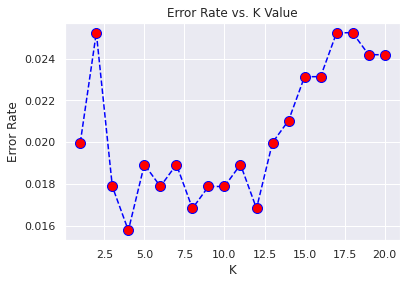

In [74]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [73]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9784    0.9701    0.9742       468
        male     0.9713    0.9793    0.9753       483

    accuracy                         0.9748       951
   macro avg     0.9749    0.9747    0.9748       951
weighted avg     0.9748    0.9748    0.9748       951



Lowest error is 0.019978969505783387 occurs at k=18.


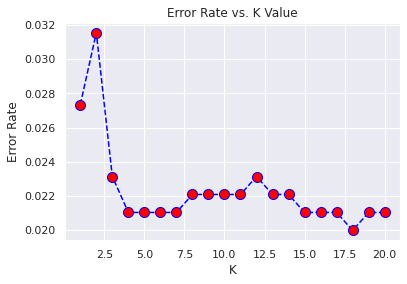

In [72]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [71]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9748    0.9936    0.9841       468
        male     0.9937    0.9752    0.9843       483

    accuracy                         0.9842       951
   macro avg     0.9843    0.9844    0.9842       951
weighted avg     0.9844    0.9842    0.9842       951



Naive Bayes¶
Using naive_bayes.GaussianNB() to build the model.

In [70]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9168    0.8953    0.9059       468
        male     0.9008    0.9213    0.9110       483

    accuracy                         0.9085       951
   macro avg     0.9088    0.9083    0.9084       951
weighted avg     0.9087    0.9085    0.9085       951



In [69]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9722    0.9722    0.9722       468
        male     0.9731    0.9731    0.9731       483

    accuracy                         0.9727       951
   macro avg     0.9727    0.9727    0.9727       951
weighted avg     0.9727    0.9727    0.9727       951



model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

In [0]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.027339642481598318 occurs at n=7.


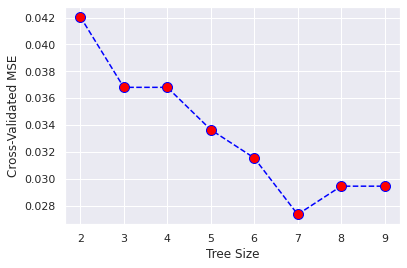

In [76]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [0]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9788    0.9747    0.9767       474
        male     0.9749    0.9790    0.9770       477

    accuracy                         0.9769       951
   macro avg     0.9769    0.9769    0.9769       951
weighted avg     0.9769    0.9769    0.9769       951



Lowest error is 0.025236593059936908 occurs at n=12.


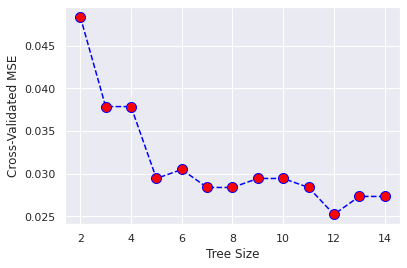

In [0]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [0]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9747    0.9747    0.9747       474
        male     0.9748    0.9748    0.9748       477

    accuracy                         0.9748       951
   macro avg     0.9748    0.9748    0.9748       951
weighted avg     0.9748    0.9748    0.9748       951



Random Forest¶
Using ensemble.RandomForestClassifier() to build the model.

In [0]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.017875920084121977 occurs at n=41.


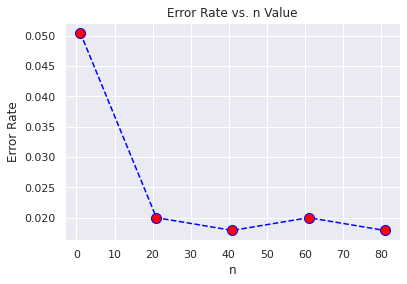

In [0]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [0]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9851    0.9747    0.9799       474
        male     0.9751    0.9853    0.9802       477

    accuracy                         0.9800       951
   macro avg     0.9801    0.9800    0.9800       951
weighted avg     0.9801    0.9800    0.9800       951



In [0]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9726    0.9747    0.9737       474
        male     0.9748    0.9727    0.9738       477

    accuracy                         0.9737       951
   macro avg     0.9737    0.9737    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951



XgBoost¶
Using xgboost.XGBClassifier() to build the model.

In [0]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9811    0.9831    0.9821       474
        male     0.9832    0.9811    0.9822       477

    accuracy                         0.9821       951
   macro avg     0.9821    0.9821    0.9821       951
weighted avg     0.9821    0.9821    0.9821       951



In [0]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9726    0.9726    0.9726       474
        male     0.9727    0.9727    0.9727       477

    accuracy                         0.9727       951
   macro avg     0.9727    0.9727    0.9727       951
weighted avg     0.9727    0.9727    0.9727       951



Support Vector Machine¶
Using svm.SVC() to build the model.

In [0]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [0]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [0]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9792512404149752
rbf  out-of-sample accuracy in SVM:  0.9800210304942166
poly  in-sample accuracy in SVM:  0.9806044203879116
poly  out-of-sample accuracy in SVM:  0.9810725552050473
linear  in-sample accuracy in SVM:  0.9742895805142084
linear  out-of-sample accuracy in SVM:  0.9737118822292324
Highest accuracy is 0.9810725552050473 occurs at poly kernel.


Lowest error is 0.017875920084121977 occurs at C=3.


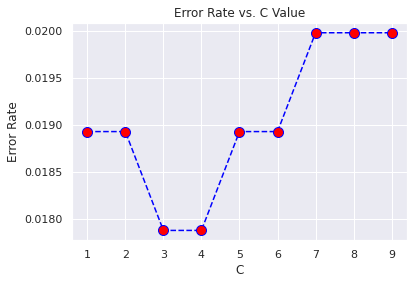

In [0]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)


In [0]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9872    0.9768    0.9820       474
        male     0.9772    0.9874    0.9823       477

    accuracy                         0.9821       951
   macro avg     0.9822    0.9821    0.9821       951
weighted avg     0.9822    0.9821    0.9821       951



In [0]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9720342805593144
rbf  out-of-sample accuracy in SVM:  0.9737118822292324
poly  in-sample accuracy in SVM:  0.968425800631484
poly  out-of-sample accuracy in SVM:  0.9737118822292324
linear  in-sample accuracy in SVM:  0.9666215606675688
linear  out-of-sample accuracy in SVM:  0.9674027339642481
Highest accuracy is 0.9737118822292324 occurs at rbf kernel.


Lowest error is 0.02103049421661409 occurs at C=5.


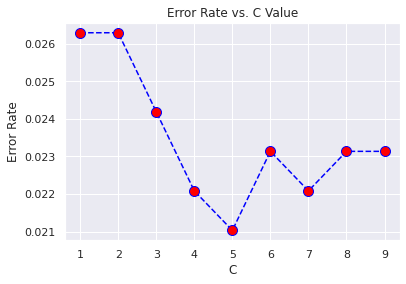

In [0]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [0]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9789    0.9789    0.9789       474
        male     0.9790    0.9790    0.9790       477

    accuracy                         0.9790       951
   macro avg     0.9790    0.9790    0.9790       951
weighted avg     0.9790    0.9790    0.9790       951



Neural Network¶
Using neural_network.MLPClassifier to build the model.

In [0]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]


Lowest error is 0.023133543638275498 occurs at C=17.


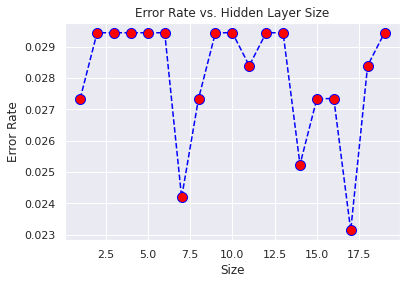

In [0]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [0]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9850    0.9684    0.9766       474
        male     0.9691    0.9853    0.9771       477

    accuracy                         0.9769       951
   macro avg     0.9770    0.9768    0.9769       951
weighted avg     0.9770    0.9769    0.9769       951



Lowest error is 0.030494216614090432 occurs at C=9.


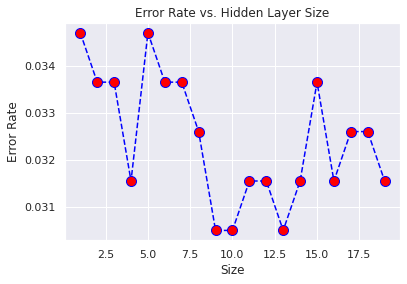

In [0]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [0]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9826    0.9557    0.9690       474
        male     0.9571    0.9832    0.9700       477

    accuracy                         0.9695       951
   macro avg     0.9699    0.9695    0.9695       951
weighted avg     0.9699    0.9695    0.9695       951



We can see that the highest accurracy is 98.74% which is made by XgBoost. XgBoost is a powerful algorithm, and very popular in Data Science competition. Next time I will try to oppotimize the parameters of XgBoost.

In [0]:
pd.get_dummies(voice_data['label'])

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3163,1,0
3164,1,0
3165,1,0
3166,1,0


In [0]:
label_dummies = pd.get_dummies(voice_data.label, prefix='Label')                           # create three dummy variables using get_dummies
label_dummies.head()

,Label_female,Label_male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [0]:
merge.colum.

In [0]:
data = pd.concat([voice_data, label_dummies], axis=1)
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,Label_female,Label_male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0,1


In [0]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label',
       'Label_female', 'Label_male'],
      dtype='object')

In [0]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label',
       'Label_female', 'Label_male'],
      dtype='object')

In [0]:
data.merge('Label_female', 'Label_male')

TypeError: ignored

In [0]:
sns.pairplot(voice_data, size = 2, aspect = 1.5)

In [0]:
## sns.pairplot(voice_data, x_vars=['Q25', 'Q75'], y_vars='label', size=5, aspect=1, kind='reg')

In [0]:
voice_data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


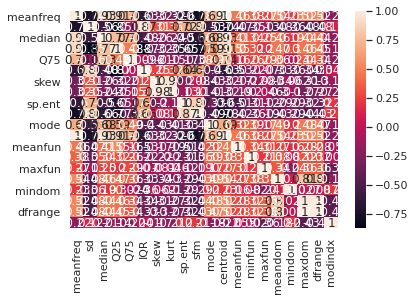

In [0]:
sns.heatmap(voice_data.corr(), annot=True )

In [0]:
4.1 Linear Regression Equation with Errors in consideration

4.2 Preparing X and y using pandas

In [0]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(3168, 22)
